In [13]:
import pandas as pd
import numpy as np

In [14]:
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/"
extra_path = ("DDims_NewLongerDriftEvalExp_MSEs_10240NPaths_Diff01").replace(
            ".", "")
score_eval=pd.read_parquet(root_dir + extra_path+ "_score_MSE.parquet", engine="fastparquet")
nad_eval=pd.read_parquet(root_dir + extra_path+ "_nad_MSE.parquet")
nad_eval_true_law=pd.read_parquet(root_dir + extra_path+"_nad_true_law_MSE.parquet")
score_eval_true_law=pd.read_parquet(root_dir + extra_path+"_score_true_law_MSE.parquet")
score_state_eval=pd.read_parquet(root_dir + extra_path+ "_score_state_MSE.parquet")
nad_state_eval=pd.read_parquet(root_dir + extra_path+ "_nad_state_MSE.parquet")
stable_state_eval = (pd.concat([score_state_eval.rename({d:d+" Score State" for d in score_state_eval.columns}, axis=1),nad_state_eval.rename({d:d+" Nadaraya State" for d in score_state_eval.columns}, axis=1)], axis=1))
stable_true_law_eval = (pd.concat([score_eval_true_law.rename({d:d+" Score True" for d in score_state_eval.columns}, axis=1),nad_eval_true_law.rename({d:d+" Nadaraya True" for d in score_state_eval.columns}, axis=1)], axis=1))
stable_alt_law_eval = (pd.concat([score_eval.rename({d:d+" Score" for d in score_state_eval.columns}, axis=1),nad_eval.rename({d:d+" Nadaraya" for d in score_state_eval.columns}, axis=1)], axis=1))

In [15]:
time_ax = np.linspace(0, 1/256*(stable_true_law_eval.shape[0]-1),stable_true_law_eval.shape[0])

In [16]:
true_law_eval = stable_true_law_eval.sort_index(axis=1).set_index(time_ax)

In [17]:
alt_law_eval = stable_alt_law_eval.sort_index(axis=1).set_index(time_ax)

In [18]:
state_eval = stable_state_eval.sort_index(axis=1).set_index(time_ax)

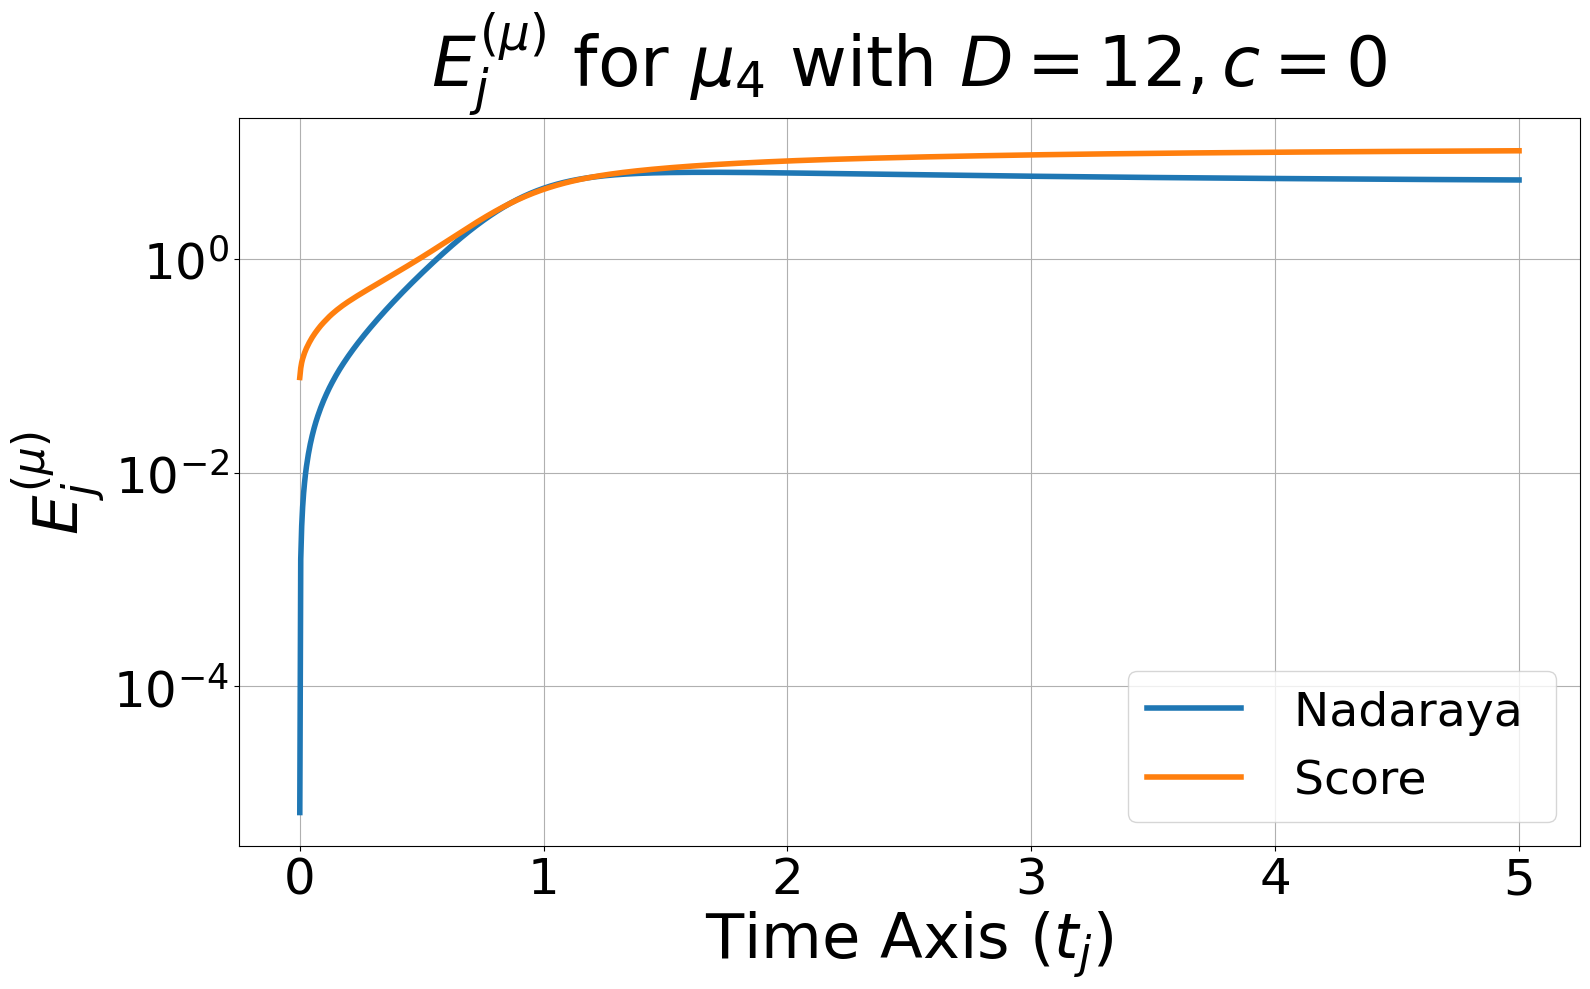

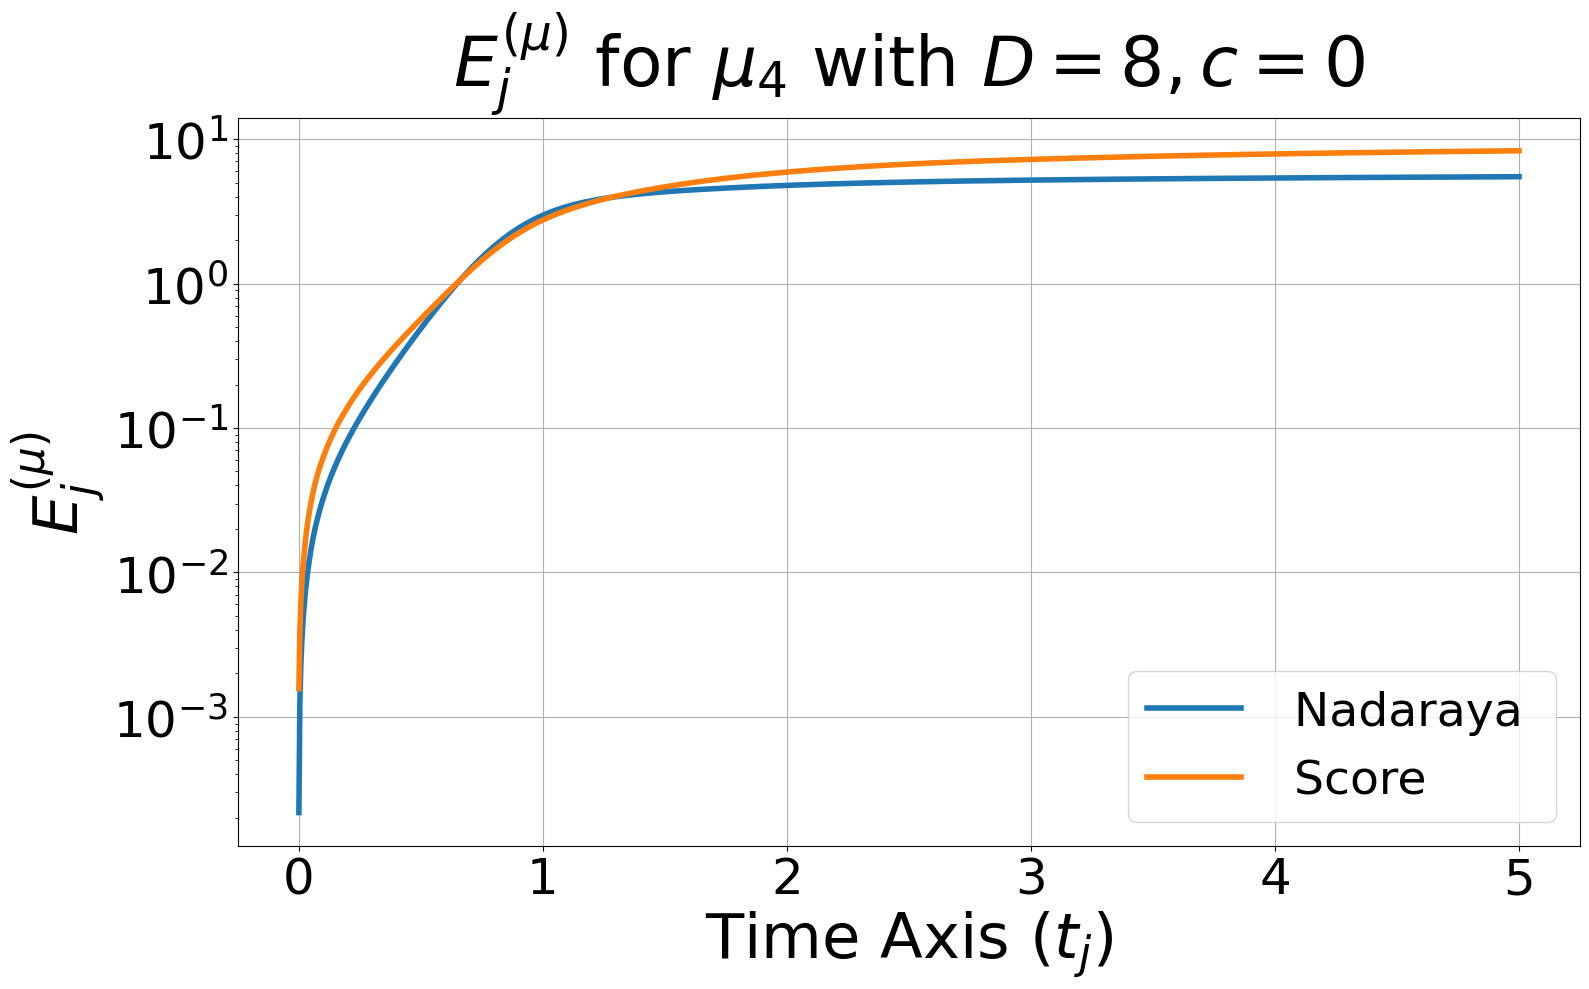

In [19]:
import matplotlib.pyplot as plt
for k in range(0, true_law_eval.shape[1], 2):
    fig, ax = plt.subplots(figsize=(16, 10))
    currevals = true_law_eval.iloc[:, k:k+2]
    d = true_law_eval.columns[k].split('DDims')[0]
    currevals.rename({d:d.split("DDims")[-1].replace("True", "") for d in currevals.columns}, axis=1).plot(ax=ax, linewidth=4)
    plt.legend(fontsize=34)
    ax.tick_params(labelsize=36)
    plt.title(rf"$E^{{(\mu)}}_j$ for $\mu_4$ with $D={d}, c=0$", fontsize=50)
    plt.ylabel(rf"$E^{{(\mu)}}_j$", fontsize=45)
    plt.xlabel("Time Axis ($t_j$)", fontsize=45)
    plt.grid(True)
    plt.yscale("log")
    plt.tight_layout()
    #plt.savefig(f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/DiffusionModelPresentationImages/FullData/{d}DDimsTrueLawOOSFullData.png")
    plt.show()
    plt.close()

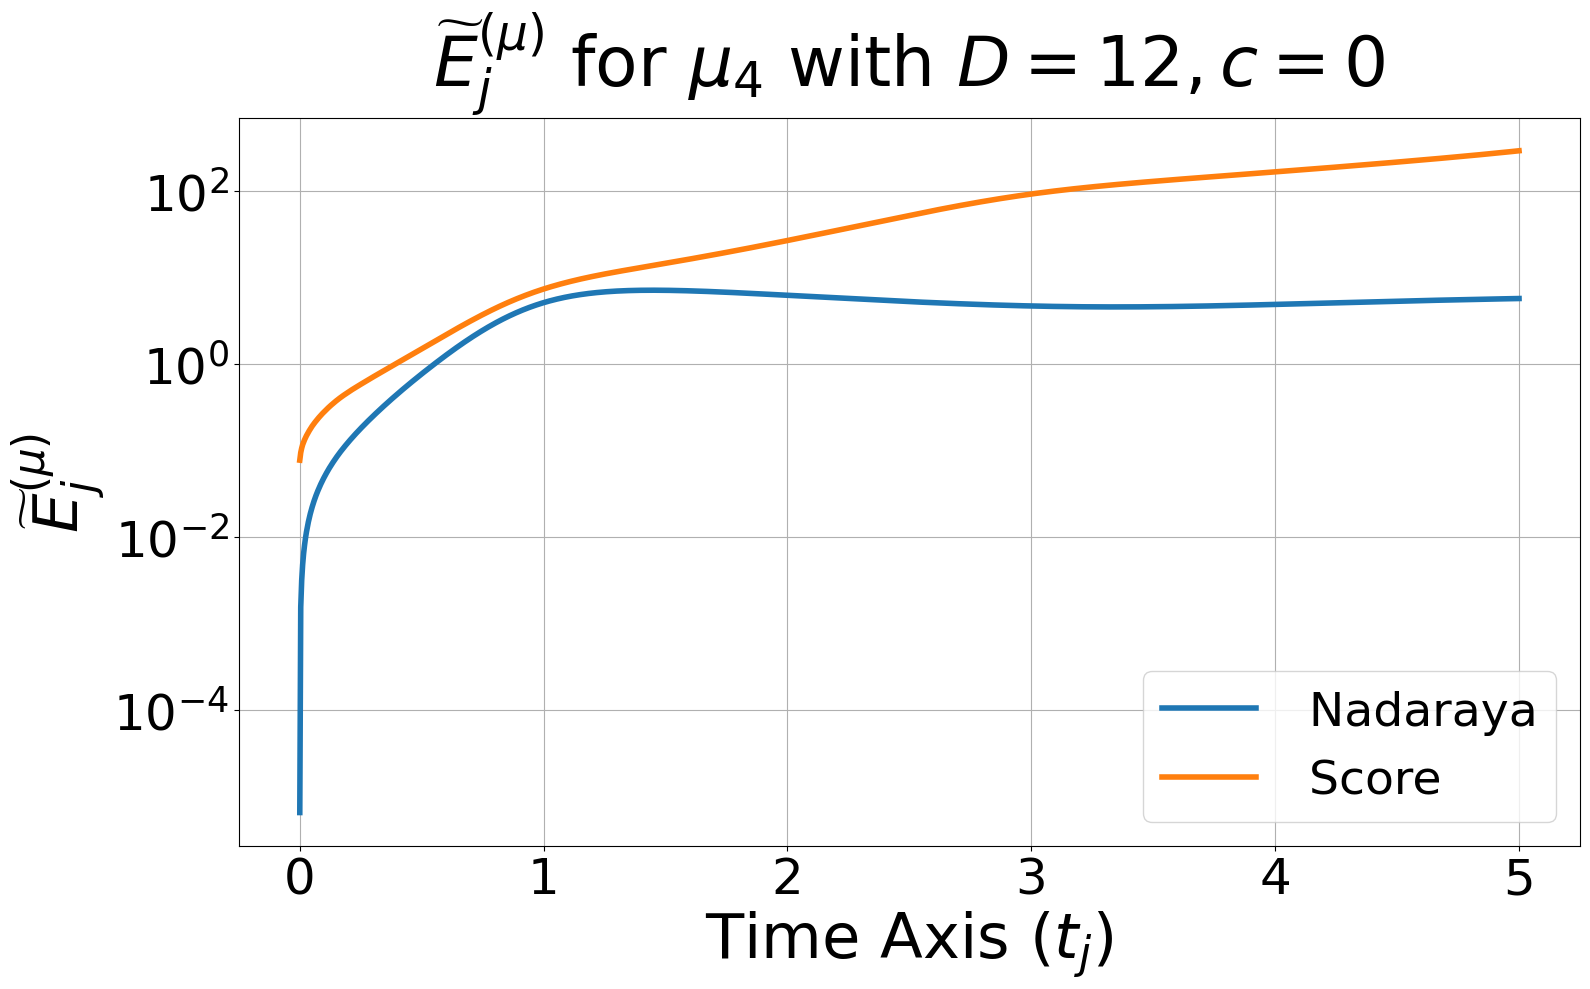

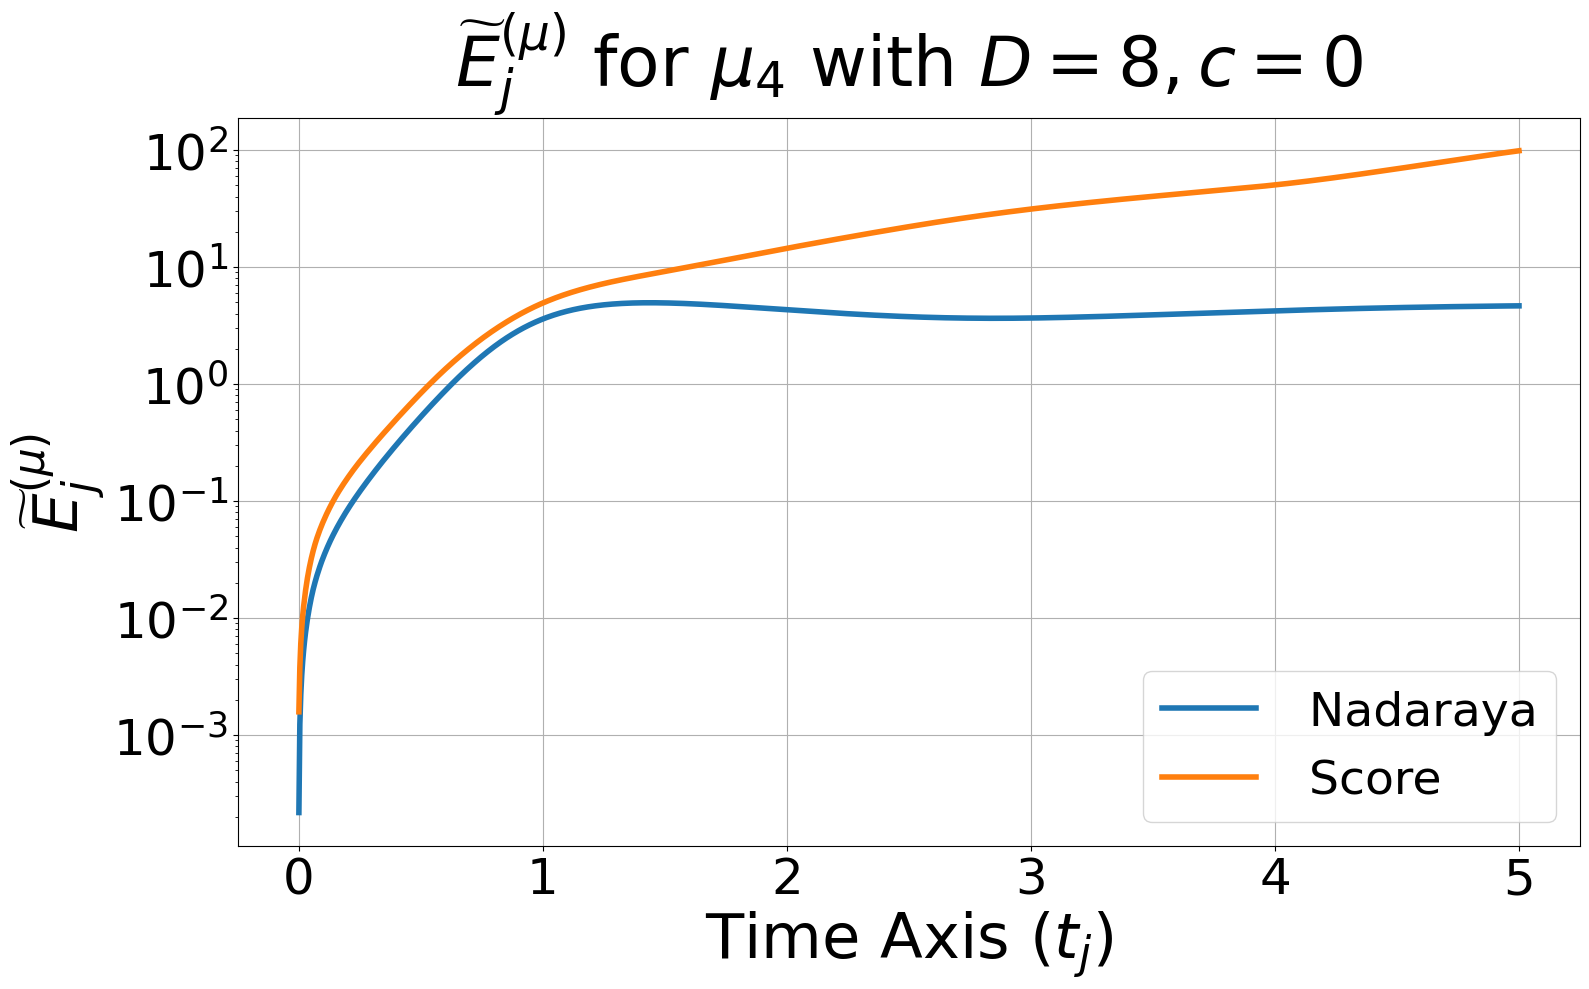

In [20]:
import matplotlib.pyplot as plt
for k in range(0, alt_law_eval.shape[1], 2):
    fig, ax = plt.subplots(figsize=(16, 10))
    currevals = alt_law_eval.iloc[:, k:k+2]
    currevals.rename({d:d.split("DDims")[-1].replace("True", "") for d in currevals.columns}, axis=1).plot(ax=ax, linewidth=4)
    plt.legend(fontsize=34)
    ax.tick_params(labelsize=36)
    d = alt_law_eval.columns[k].split('DDims')[0]
    plt.title(rf"${{\widetilde{{E}}}}^{{(\mu)}}_j$ for $\mu_4$ with $D={d}, c=0$", fontsize=50)
    plt.ylabel(rf"${{\widetilde{{E}}}}^{{(\mu)}}_j$", fontsize=45)
    plt.xlabel("Time Axis ($t_j$)", fontsize=45)
    plt.grid(True)
    plt.yscale("log")
    plt.tight_layout()
    #plt.savefig(f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/DiffusionModelPresentationImages/FullData/{d}DDimsAltLawOOSFullData.png")
    plt.show()
    plt.close()

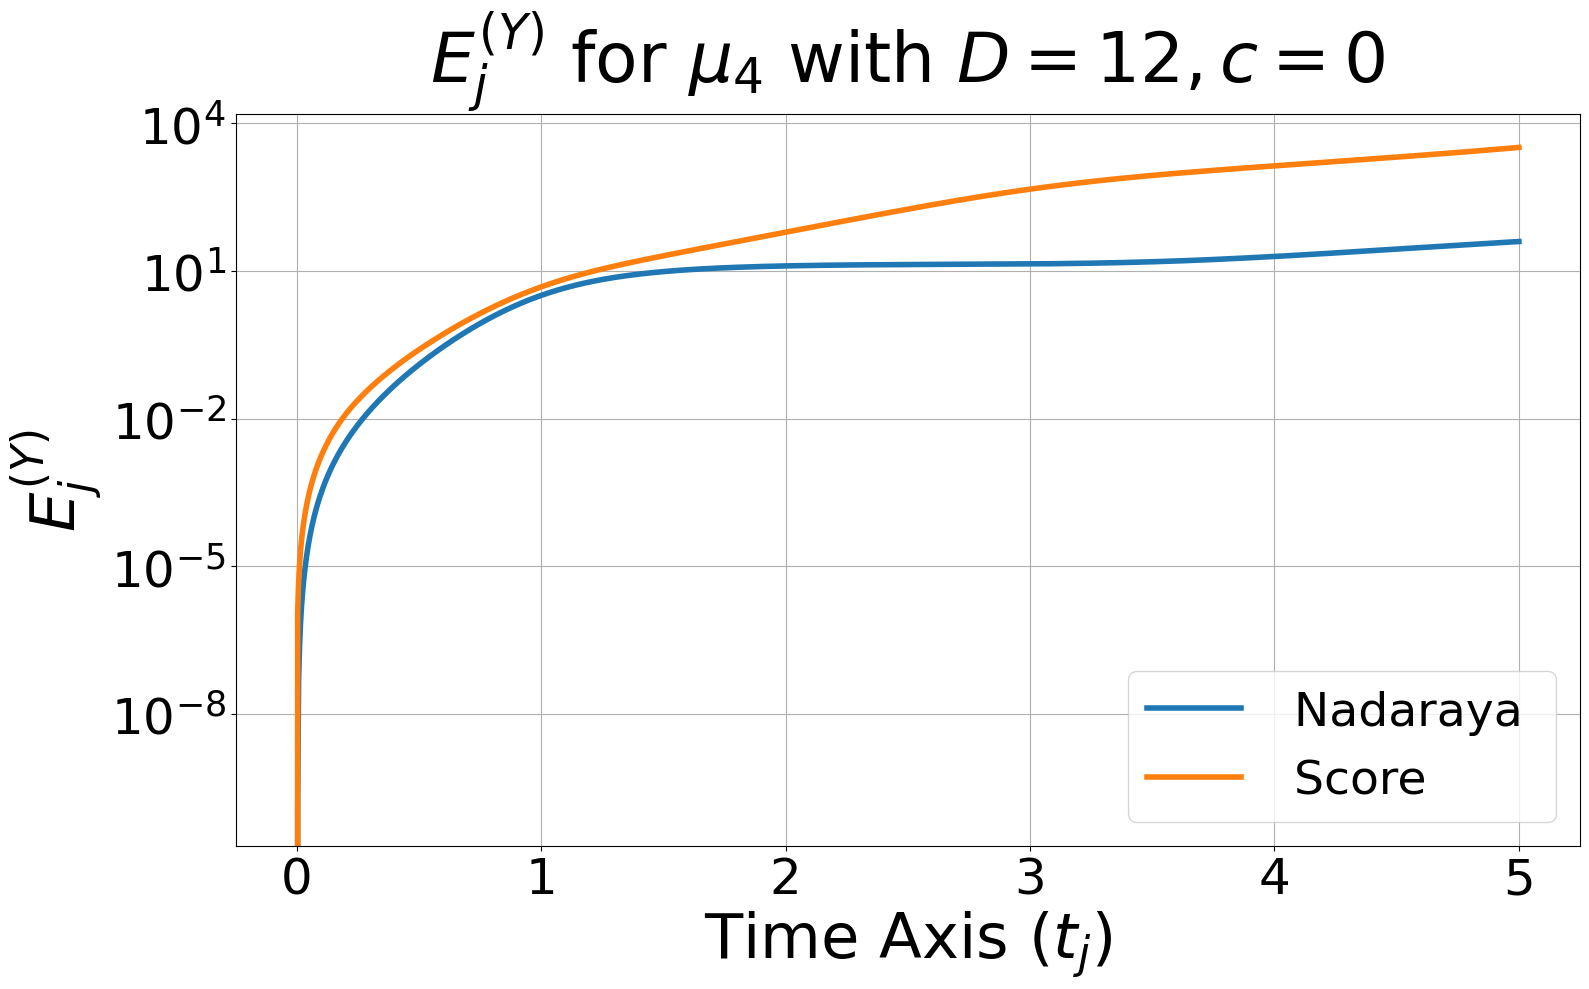

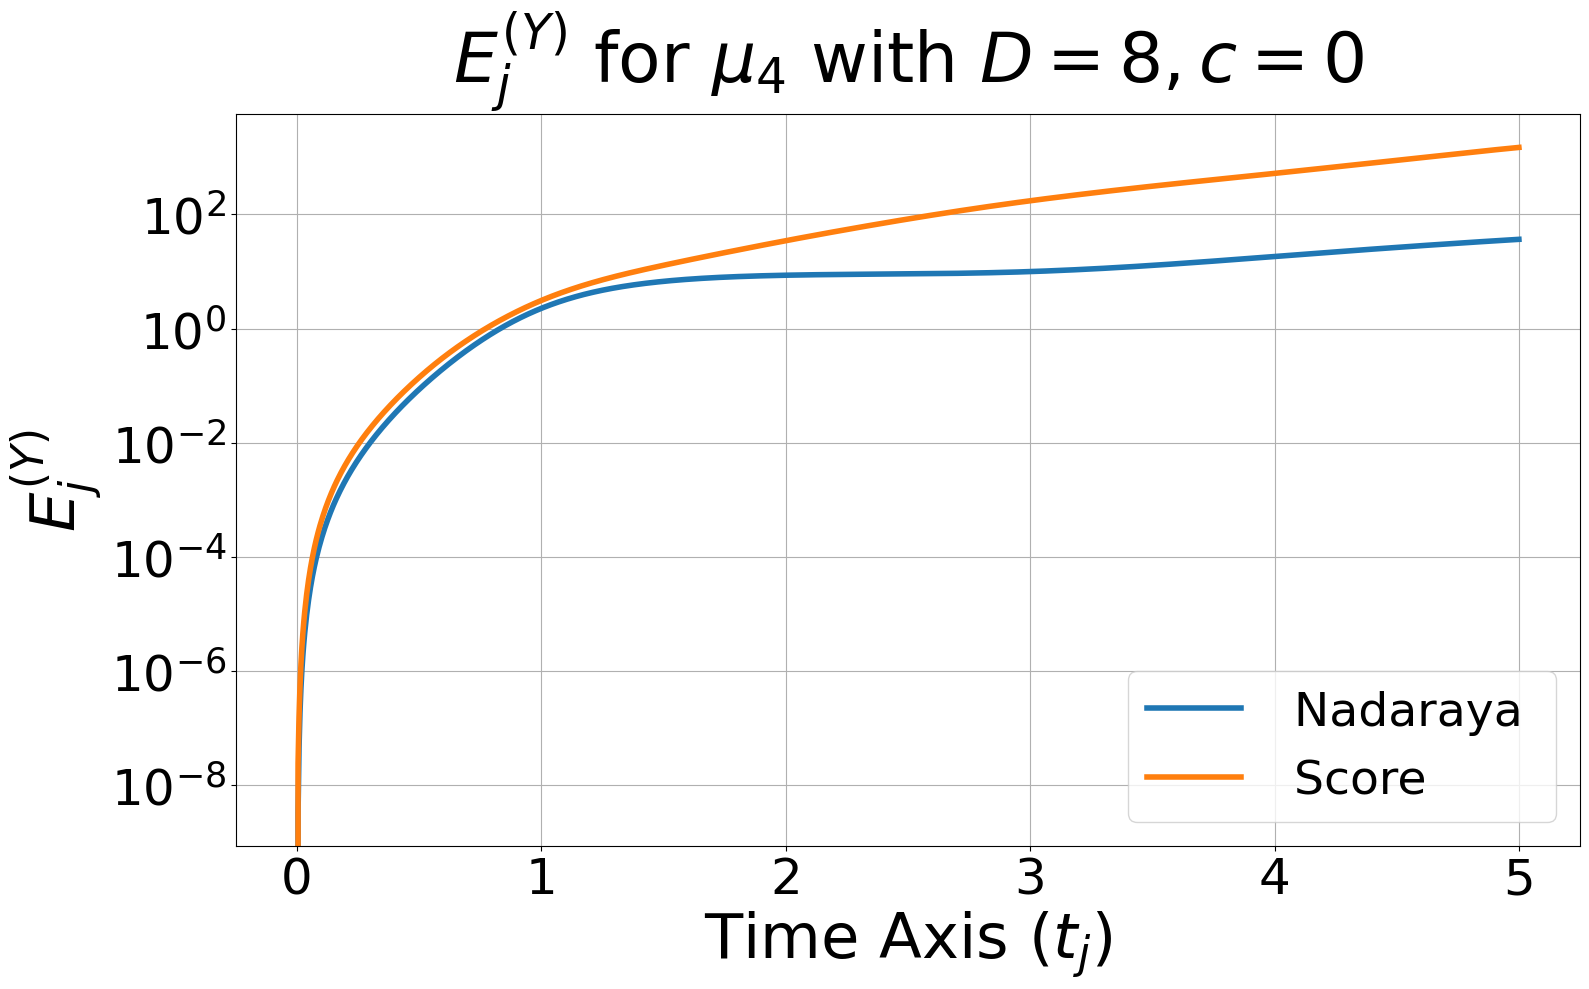

In [21]:
import matplotlib.pyplot as plt
for k in range(0, state_eval.shape[1], 2):
    fig, ax = plt.subplots(figsize=(16, 10))
    currevals = state_eval.iloc[:, k:k+2]
    currevals.rename({d:d.split("DDims")[-1].replace("State", "") for d in currevals.columns}, axis=1).plot(ax=ax, linewidth=4)
    plt.legend(fontsize=34)
    ax.tick_params(labelsize=36)
    d = state_eval.columns[k].split('DDims')[0]
    plt.title(rf"$E^{{(Y)}}_j$ for $\mu_4$ with $D={d}, c=0$", fontsize=50)
    plt.ylabel(rf"$E^{{(Y)}}_j$", fontsize=45)
    plt.xlabel("Time Axis ($t_j$)", fontsize=45)
    plt.grid(True)
    plt.yscale("log")
    plt.tight_layout()
    #plt.savefig(f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/DiffusionModelPresentationImages/FullData/{d}DDimsStateErrorOOSFullData.png")
    plt.show()
    plt.close()

In [22]:
s=(true_law_eval.iloc[[-1], :].T.assign(D=lambda x: x.index.map(lambda y:int(y.split('DDims')[0]))).assign(T=lambda x: x.index.map(lambda y:"_Nadaraya" if "Nad" in y else "Score")).sort_values("T", axis=0).set_index("D").groupby(level=0, axis=0, group_keys=True).apply(lambda x: x.set_index("T"))).iloc[:, 0].unstack(level=-1).round(3)
print(s)

T    Score  _Nadaraya
D                    
8    8.303      5.490
12  10.284      5.482


In [23]:
s=(alt_law_eval.iloc[[-1], :].T.assign(D=lambda x: x.index.map(lambda y:int(y.split('DDims')[0]))).assign(T=lambda x: x.index.map(lambda y:"_Nadaraya" if "Nad" in y else "Score")).sort_values("T", axis=0).set_index("D").groupby(level=0, axis=0, group_keys=True).apply(lambda x: x.set_index("T"))).iloc[:, 0].unstack(level=-1).round(3)
print(s)

T     Score  _Nadaraya
D                     
8    98.450      4.656
12  287.549      5.664


In [24]:
s=(state_eval.iloc[[-1], :].T.assign(D=lambda x: x.index.map(lambda y:int(y.split('DDims')[0]))).assign(T=lambda x: x.index.map(lambda y:"_Nadaraya" if "Nad" in y else "Score")).sort_values("T", axis=0).set_index("D").groupby(level=0, axis=0, group_keys=True).apply(lambda x: x.set_index("T"))).iloc[:, 0].unstack(level=-1).round(3)
print(s)

T      Score  _Nadaraya
D                      
8   1490.296     36.540
12  3248.643     39.834
